<a href="https://colab.research.google.com/github/NikaMasa51/test_project/blob/master/weed_VGG16_fine_tuning_cls09_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

公開してあるグーグルドライブからファイルをダウンロードします

In [0]:
!pwd
%cd WEED_KERAS
!pwd

/content
[Errno 2] No such file or directory: 'WEED_KERAS'
/content
/content


In [0]:
#グーグルドライブからファイルをダウンロードする方法
#ファイル限定

import requests

def download_file_from_google_drive(id, destination):

    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)

    token = get_confirm_token(response)

    if token:

        params = { 'id' : id, 'confirm' : token }

        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):

    for key, value in response.cookies.items():

        if key.startswith('download_warning'):

            return value

    return None

def save_response_content(response, destination):

    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:

        for chunk in response.iter_content(CHUNK_SIZE):

            if chunk: # filter out keep-alive new chunks

                f.write(chunk)

#取得されるトークン
file_id = '1ASqiCvbRMXfg0uJfgJJ7CbXpo9dVpXhM' # clustr09
# file_id = '1_APh3RJ744TvtlcGrxa7Mkg4e1SMpa-E' # CLS09

#欲しいフォルダ名
destination = 'cluster09.zip'

download_file_from_google_drive(file_id, destination)



In [3]:
!unzip cluster09.zip

Archive:  cluster09.zip
   creating: cluster09/
   creating: cluster09/hakidamegiku/
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_10.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_14.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_16.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_17.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_19.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_2.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_3.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1546_7.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1547_10.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1547_13.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1547_3.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1573_1.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_IMG_1573_10.JPG  
  inflating: cluster09/hakidamegiku/hakidamegiku_

VGG16というすでに訓練済みのモデルを途中まで利用してモデルを構築します

ファイルに番号を振る

In [0]:
import os
import numpy as np

clsdir = "./cluster09"
weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
for weed_name in weed_names:  
  file_names = os.listdir(os.path.join(clsdir, weed_name))
  for num, file_name in enumerate(file_names):
    # 変更前ファイル
    path1 = os.path.join(clsdir, weed_name, file_name)
    # 変更後ファイル
    path2= os.path.join(clsdir, weed_name, str(weed_name) +'_'+str(num+1)+'.JPG')
    # ファイル名の変更
    os.rename(path1, path2)
    # ファイルの存在確認
    print(os.path.exists(path2))


解凍したファイルをそれぞれ訓練データと検証用のデータに分けます

In [0]:
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = "./cluster09"
# os.mkdir(original_dataset_dir)

# The directory where we will
# store our smaller dataset
base_dir = "./CLS09"
os.mkdir(base_dir)


for i in range(3):
  print(i)
  # Directories for our training,
  # validation (and test) splits
  train_dir = os.path.join(base_dir, "train" + str(i+1))
  os.mkdir(train_dir)
  validation_dir = os.path.join(base_dir, "validation" + str(i+1))
  os.mkdir(validation_dir)
  # test_dir = os.path.join(base_dir, 'test')
  # os.mkdir(test_dir)

#3分類のclassを入力
weeds=["grass","vine","broad"]
dirs = os.listdir(base_dir)
for weed in weeds:
  for dir in dirs:
    # Directory with our training pictures
    weed_dir = os.path.join(base_dir, dir, weed)
    os.mkdir(weed_dir)


0
1
2


In [0]:
# 10分類から3分類へのclassを入力

classes = {"hakidamegiku":"broad","hosoaogeitou":"broad","ichibi":"broad",
         "inubie":"grass","kosendangusa":"broad","mameasagao":"vine",
         "mehishiba":"grass","ohishiba":"grass","oinutade":"broad","shiroza":"broad"}

# catg=["grass","vine","broad"]


イネ科のディレクトリ

In [0]:
from os.path import join
import random

clsdir = "./cluster09"
base_dir = "./CLS09"
tra_val_dirs = os.listdir(base_dir)

weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# grass
for tra_val_dir in tra_val_dirs:
  for weed_name in weed_names:
    if classes[weed_name] == "grass": 
      print(weed_name)
      file_names = os.listdir(os.path.join(clsdir, weed_name))
      files30 = random.sample(file_names, int(30))
      for file_name in file_names:
        if  file_name in files30:
          # 移動元のファイル
          path1 = os.path.join(clsdir, weed_name, file_name)
          # 移動先のファイル
          path2= os.path.join(base_dir, tra_val_dir, classes[weed_name], file_name)
          # ファイルを移動
          new_path = shutil.move(path1, path2)
          # ファイルの存在確認
          print(os.path.exists(path2))


マメアサガオのディレクトリ

In [0]:
from os.path import join
import random

clsdir = "./cluster09"
base_dir = "./CLS09"
tra_val_dirs = os.listdir(base_dir)

weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# vine
for tra_val_dir in tra_val_dirs:
  if tra_val_dir == "train1": 
    for weed_name in weed_names:
      if classes[weed_name] == "vine": 
        print(weed_name)
        file_names = os.listdir(os.path.join(clsdir, weed_name))
        files100 = random.sample(file_names, int(100))
        num1 = 0
        num2 = 0
        for file_name in file_names:
          if  file_name in files100:
            if num1 >= 90:
              continue
            # 移動元のファイル
            path1 = os.path.join(clsdir, weed_name, file_name)
            # 移動先のファイル
            path2= os.path.join(base_dir, "train1", classes[weed_name], file_name)
            # ファイルを移動
            new_path = shutil.move(path1, path2)
            # ファイルの存在確認
            print(os.path.exists(path2))
            num1 = num1 + 1
          else:
            if num2 >= 90:
              continue 
            # 移動元のファイル
            path1 = os.path.join(clsdir, weed_name, file_name)
            # 移動先のファイル
            path2= os.path.join(base_dir, "validation1", classes[weed_name], file_name)
            # ファイルを移動
            new_path = shutil.move(path1, path2)
            # ファイルの存在確認
            print(os.path.exists(path2))
            num2 = num2 + 1

for j in range(2):
    # コピー元のディレクトリ
    path1 = os.path.join(base_dir, "train" + str(j+1), "vine")
    files = os.listdir(path1)
    # コピー先のディレクトリ
    path2= os.path.join(base_dir, "train" + str(j+2), "vine")
    num_files = len(files)  # 進捗表示用
    n = 0  # 進捗表示用
    for fname in files:
      shutil.copy(os.path.join(path1, fname), path2, follow_symlinks=True)  # デフォルトTrueですが一応
    
for j in range(2):
    # コピー元のディレクトリ
    path1 = os.path.join(base_dir, "validation" + str(j+1), "vine")
    files = os.listdir(path1)
    # コピー先のディレクトリ
    path2= os.path.join(base_dir, "validation" + str(j+2), "vine")
    num_files = len(files)  # 進捗表示用
    n = 0  # 進捗表示用
    for fname in files:
      shutil.copy(os.path.join(path1, fname), path2, follow_symlinks=True)  # デフォルトTrueですが一応
   


広葉雑草のディレクトリ

In [0]:
from os.path import join
import random

clsdir = "./cluster09"
base_dir = "./CLS09"
tra_val_dirs = os.listdir(base_dir)

weed_names = os.listdir(clsdir)
# ファイル（クラスごとに分かれている）を順番に読み取り
# broad
for tra_val_dir in tra_val_dirs:
  for weed_name in weed_names:
    if classes[weed_name] == "broad": 
      print(weed_name)
      file_names = os.listdir(os.path.join(clsdir, weed_name))
      files180 = random.sample(file_names, int(15))
      for file_name in file_names:
        if  file_name in files180:
          # 移動元のファイル
          path1 = os.path.join(clsdir, weed_name, file_name)
          # 移動先のファイル
          path2= os.path.join(base_dir, tra_val_dir, classes[weed_name], file_name)
          # ファイルを移動
          new_path = shutil.move(path1, path2)
          # ファイルの存在確認
          print(os.path.exists(path2))


In [0]:
!pwd

/home/test/WEED_KERAS


In [0]:
traindir_ = "./CLS09/train3"
valdir_ = "./CLS09/validation3"
trains = os.listdir(traindir_)
for train in trains:
  print(train)
  print(len(os.listdir(os.path.join(traindir_, train))))

vine
90
broad
90
grass
90


★解凍したファイルをそれぞれ訓練データと検証用のデータに分けます

In [0]:
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import keras.preprocessing.image as Image

input_size = 224

train_dir1 = "./CLS09/train1"
train_dir2 = "./CLS09/train2"
train_dir3 = "./CLS09/train3"
validation_dir1 = "./CLS09/validation1"
validation_dir2 = "./CLS09/validation2"
validation_dir3 = "./CLS09/validation3"


train_datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 90,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            rescale=1./255
        )

val_datagen = Image.ImageDataGenerator(rescale=1./255)



train_generator1 = train_datagen.flow_from_directory(
            train_dir1,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

train_generator2 = train_datagen.flow_from_directory(
            train_dir2,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

train_generator3 = train_datagen.flow_from_directory(
            train_dir3,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator1 = val_datagen.flow_from_directory(
            validation_dir1,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator2 = val_datagen.flow_from_directory(
            validation_dir2,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )

validation_generator3 = val_datagen.flow_from_directory(
            validation_dir3,
            target_size=(input_size,input_size),
            batch_size=10,
            class_mode='categorical'
        )


Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 270 images belonging to 3 classes.


★cluster09アンサンブル学習開始

In [0]:

#ファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications import VGG16
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import History, Callback
from keras.objectives import categorical_crossentropy
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.utils import to_categorical
from scipy.stats import mode
import os, pickle


def create_cnn():
  input_size=224
  #input_sizeは224,224までOK。

  vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_size,input_size, 3))
  last = vgg_conv.output

  vgg_conv.trainable = True

  set_trainable = False
  for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
      set_trainable = True
    if set_trainable:
      layer.trainable = True
    else:
      layer.trainable = False

  mod = Flatten()(last)
  mod = Dense(256, activation='relu')(mod)
  #mod = Dropout(0.5)(mod)
  preds = Dense(3, activation='softmax')(mod)

  model = models.Model(vgg_conv.input, preds)

  return model


アンサンブルの手法

In [0]:
# 確率の平均を取るアンサンブル（ソフトアンサンブル）
def ensembling_soft(models, X):
    preds_sum = None
    for model in models:
        if preds_sum is None:
            preds_sum = model.predict_generator(X)
        else:
            preds_sum += model.predict_generator(X)
    probs = preds_sum / len(models)
    return np.argmax(probs, axis=-1)

# 多数決のアンサンブル（ハードアンサンブル）
def ensembling_hard(models, X):
    pred_labels = np.zeros((X.shape[0], len(models)))
    for i, model in enumerate(models):
        pred_labels[:, i] = np.argmax(model.predict_generator(X), axis=-1)
    return np.ravel(mode(pred_labels, axis=-1)[0])


チェックポイント

In [0]:
class Checkpoint(Callback):
    def __init__(self, model, filepath):
        self.model = model
        self.filepath = filepath
        self.best_val_acc = 0.0
        self.best_val_loss = 0.1

    def on_epoch_end(self, epoch, logs):
        # val_accuracyが最大の時ににweightを保存する
        # if self.best_val_acc < logs["val_accuracy"]:
        #     self.model.save_weights(self.filepath)
        #     self.best_val_acc = logs["val_accuracy"]
        #     print("Weights saved.", self.best_val_acc)

        # val_lossが最小の時ににweightを保存する
        if self.best_val_loss > logs["val_loss"]:
            self.model.save_weights(self.filepath)
            self.best_val_loss = logs["val_loss"]
            print("Weights saved.", self.best_val_loss)
        # print(epoch + 1)

        # epochの最後にweightを保存する
        # if epoch == 99:
        #   print("epoch equals ", epoch)
        #   self.model.save_weights(self.filepath)
        #   self.best_val_loss = logs["val_loss"]
        #   print("Weights saved.", self.best_val_loss)

モデルを実行して画像を学習させていきます

In [0]:
def train(ensemble_type):
    assert ensemble_type in ["hard", "soft"]

    train_generator = [train_generator1, train_generator2, train_generator3]
    # validation_generator = [validation_generator1, validation_generator2, validation_generator3]

    n_estimators = 3
    models = []
    global_hist = {"hists":[], "ensemble_test":[]}
    single_preds = np.zeros((270, n_estimators))
    for i in range(n_estimators):
        print("Estimator",i+1,"train starts")
        train_model = create_cnn()
        train_model.compile(optimizer=Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

        models.append(train_model)

        hist = History()
        cp = Checkpoint(train_model, f"weights_{i}.hdf5")
        train_model.fit_generator(train_generator[i],epochs=100,validation_data=validation_generator1,callbacks=[hist, cp])      

        # 最良のモデルの読み込み
        train_model.load_weights(f"weights_{i}.hdf5")
        for layer in train_model.layers:
            layer.trainable = False

        # 単体の推論
        single_preds[:, i] = np.argmax(train_model.predict_generator(validation_generator2), axis=-1)
        single_test_acc = accuracy_score(validation_generator2.classes[validation_generator2.index_array], np.argmax(train_model.predict_generator(validation_generator2), axis=-1))
        print("Current Single Test Accuracy : ", single_test_acc)

        # アンサンブルの精度の記録
        global_hist["hists"].append(hist.history)
        if ensemble_type == "soft":
            ensemble_test_pred = ensembling_soft(models, validation_generator2)
        else:
            ensemble_test_pred = ensembling_hard(models, validation_generator2)
        ensemble_test_acc = accuracy_score(validation_generator2.classes[validation_generator2.index_array], ensemble_test_pred)

        global_hist["ensemble_test"].append(ensemble_test_acc)
        print("Current Ensemble Test Accuracy : ", ensemble_test_acc)

    print(len(single_preds))
    global_hist["corrcoef"] = np.corrcoef(single_preds, rowvar=False)
    print("Corr Matrix on each estimators (Test)")
    print(global_hist["corrcoef"])

    with open(f"ensemble_{ensemble_type}.dat", "wb") as fp:
        pickle.dump(global_hist, fp)




In [0]:
K.clear_session()
train("soft")

Estimator 1 train starts
58892288/58889256 [==============================] - 2s 0us/step
Epoch 1/100
27/27 [==============================] - 14s 503ms/step - loss: 0.8959 - accuracy: 0.6037 - val_loss: 0.5341 - val_accuracy: 0.8037
Epoch 2/100
27/27 [==============================] - 6s 223ms/step - loss: 0.5011 - accuracy: 0.8593 - val_loss: 0.3195 - val_accuracy: 0.8889
Epoch 3/100
27/27 [==============================] - 6s 213ms/step - loss: 0.2904 - accuracy: 0.8963 - val_loss: 0.2482 - val_accuracy: 0.9148
Epoch 4/100
27/27 [==============================] - 6s 213ms/step - loss: 0.2233 - accuracy: 0.9037 - val_loss: 0.1849 - val_accuracy: 0.9556
Epoch 5/100
27/27 [==============================] - 6s 214ms/step - loss: 0.1901 - accuracy: 0.9222 - val_loss: 0.0296 - val_accuracy: 0.9259
Weights saved. 0.029615992680191994
Epoch 6/100
27/27 [==============================] - 6s 212ms/step - loss: 0.1266 - accuracy: 0.9593 - val_loss: 0.1436 - val_accuracy: 0.9333
Epoch 7/100
27/

27
2
10
(224, 224, 3)
1
0


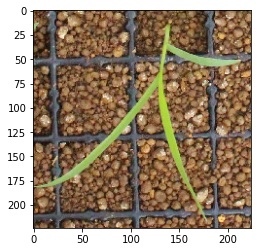

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image

print(len(validation_generator2))
max_img_num = 16
imgs = [] 
cnt = 0
for d_list in validation_generator2:
  print(len(d_list))
  for d in d_list:
    print(len(d))
    print(d[0].shape)
    imgs.append(image.array_to_img(d[9], scale=True))
    if (len(imgs) % max_img_num) == 0:
      cnt += 1
      break
    break
  break
print(len(imgs))
print(cnt)
plt.imshow(imgs[0])

In [0]:
def predict():
  n_estimators = 3
  models_ = []
  global_hist = {"hists":[], "ensemble_test":[]}
  single_preds = np.zeros((270, n_estimators))
  for i in range(n_estimators):
      train_model = create_cnn()
      models_.append(train_model)
      print("Estimator",i+1,"weight load")
      # 最良のモデルの読み込み
      train_model.load_weights(f"weights_{i}.hdf5")
      for layer in train_model.layers:
          layer.trainable = False

      # 単体の推論
      single_preds[:, i] = np.argmax(train_model.predict_generator(validation_generator2), axis=-1)
      # print(single_preds[:, i])
      # print(np.argmax(train_model.predict_generator(validation_generator2), axis=-1))
      # print(validation_generator2.classes[validation_generator2.index_array])
      corr_index = np.argmax(train_model.predict_generator(validation_generator2), axis=-1) != validation_generator2.classes[validation_generator2.index_array]
      print(corr_index)
      for i, index in enumerate(corr_index):
        # print(index)
        # print(type(index))
        # break
        if index == True:
          print(i, validation_generator2.index_array[i])
        #   print(np.argmax(train_model.predict_generator(validation_generator2), axis=-1)[index], validation_generator2.classes[validation_generator2.index_array][index])
      single_test_acc = accuracy_score(validation_generator2.classes[validation_generator2.index_array], np.argmax(train_model.predict_generator(validation_generator2), axis=-1))
      print("Current Single Test Accuracy : ", single_test_acc)

  global_hist["corrcoef"] = np.corrcoef(single_preds, rowvar=False)
  print("Corr Matrix on each estimators (Test)")
  print(global_hist["corrcoef"])

In [0]:
predict()

Estimator 1 weight load
[False False  True False  True  True  True False  True  True False  True
  True False  True  True  True  True False  True  True  True  True  True
 False False False  True False  True  True False  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True False  True  True False  True  True  True
  True False  True False  True False False  True False False False  True
  True False False False  True  True  True False False  True  True  True
  True  True  True  True False False  True  True False False  True  True
 False  True  True  True  True False False False False False False  True
 False False  True False  True False False  True  True  True False  True
  True  True  True  True False  True False  True False  True  True  True
 False  True  True  True False False  True  True  True False  True False
  True  True False  True Fa

In [0]:
import numpy as np
hai = np.zeros((270, 3))
hai[:,1] = 1
hai

In [0]:
# print(single_preds[:, 0])
print(validation_generator2.classes[validation_generator2.index_array])
print(validation_generator2.index_array)
# print(validation_generator2.classes)

print("23番目の画像")
print(validation_generator2.index_array[138])
print(validation_generator2.classes[23])
print(validation_generator2[13][1])
print(validation_generator2[13][0][8].shape)

print("65番目の画像")
print(validation_generator2.index_array[14])
print(validation_generator2.classes[65])
print(validation_generator2[1][1][4])
print(validation_generator2[1][0][4].shape)

print("88番目の画像")
print(validation_generator2.index_array[120])
print(validation_generator2.classes[88])
print(validation_generator2[12][1][0])
print(validation_generator2[12][0][0].shape)

# print(validation_generator2[26][1])
# for i, j in single_preds[:, 0], validation_generator2.classes[validation_generator2.index_array]:
#   if i == j:
#     validation_generator2.classes[]

[0 0 0 1 0 2 0 2 0 2 1 0 0 0 2 0 2 2 0 0 1 0 2 2 1 1 1 2 2 0 0 2 0 0 0 2 2
 0 2 0 0 2 0 0 2 1 2 0 1 2 2 2 0 1 2 1 0 1 2 1 1 1 0 0 2 2 0 2 1 2 0 0 0 0
 2 1 2 1 1 2 0 2 1 0 2 1 2 0 1 2 1 2 0 0 1 1 2 1 2 1 2 1 1 1 0 2 1 2 0 0 0
 1 2 0 2 0 1 0 2 2 1 2 1 2 1 1 1 1 0 2 2 0 1 0 0 2 2 1 1 1 0 2 1 2 2 1 1 0
 0 2 1 2 0 1 2 1 0 0 0 2 2 1 1 0 1 1 0 0 2 0 0 2 2 1 2 2 1 2 2 2 2 0 1 2 2
 1 1 1 2 1 2 0 0 0 1 0 2 1 1 0 0 1 0 0 1 2 1 0 0 1 0 2 1 1 1 1 0 0 2 0 1 1
 1 2 2 0 0 2 0 0 2 0 1 0 1 2 1 0 1 0 1 0 2 2 0 1 2 2 2 2 2 1 0 1 2 1 1 2 1
 1 0 2 0 0 1 1 2 1 1 1]
[ 10  89  47 109  52 246  13 258  59 260 146  63  75  19 189   9 190 224
  43  88 134  51 268 259 155 157 175 183 202  73  54 236  55  26  41 203
 193  23 269  66  57 220   8  38 261 125 216   3 135 209 242 194  36 127
 196  92  35 119 186  91  94 133  31  84 229 255  34 185 129 233  32  22
  50  25 217 171 218 179 172 192  68 207 164   7 221 130 197  39 101 266
 105 215  77   5  95 169 199 165 241 117 265 143 103 173  28 195 100 214
  69  30  46 

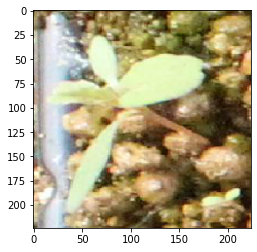

In [0]:
# index 23

import matplotlib.pyplot as plt
from keras.preprocessing import image

imgs = image.array_to_img(validation_generator2[13][0][8], scale=True)
plt.imshow(imgs)

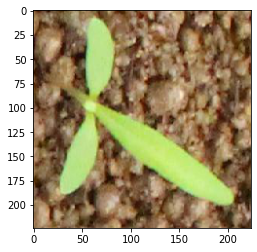

In [0]:
# index 65

import matplotlib.pyplot as plt
from keras.preprocessing import image

imgs = image.array_to_img(validation_generator2[1][0][4], scale=True)
plt.imshow(imgs)

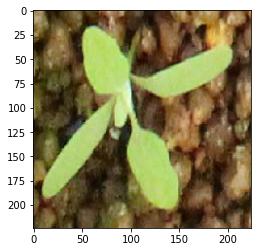

In [0]:
# index 88

import matplotlib.pyplot as plt
from keras.preprocessing import image

imgs = image.array_to_img(validation_generator2[12][0][0], scale=True)
plt.imshow(imgs)

In [0]:
train_model = create_cnn()
train_model.load_weights(f"weights_1.hdf5")
for layer in train_model.layers:
  layer.trainable = False
models_ = []
models_.append(train_model)
ensemble_test_pred = ensembling_soft(models_, train_generator1)
print(ensemble_test_pred.shape)
print(train_generator1.classes[train_generator1.index_array].shape)
score = accuracy_score(train_generator1.classes, ensemble_test_pred)
score_ = accuracy_score(train_generator1.classes[train_generator1.index_array], ensemble_test_pred)
print(score)
print(score_)
# print(train_model.predict_generator(validation_generator1)[0])
# print(validation_generator1.classes[validation_generator1.index_array])
# print(validation_generator1.index_array)
# print(train_generator1[1])

modelsのlenは： 1 ______________________
(270,)
(270,)
0.31851851851851853
0.34074074074074073


In [0]:
validation_generator1.classes

■単体で学習し分類器を作成

In [0]:
# 個別の分類器で実施
#ここからファインチューニング+VGG+水増し。ここから実行してOK（VGG16をダウンロード）
from keras import models
from keras import layers
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications import VGG16


input_size=224
#input_sizeは224,224までOK。デモ用に数字を150に落としてある。


vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(input_size,input_size, 3))
last = vgg_conv.output


vgg_conv.trainable = True

set_trainable = False
for layer in vgg_conv.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


mod = Flatten()(last)
mod = Dense(256, activation='relu')(mod)
#mod = Dropout(0.5)(mod)
preds = Dense(3, activation='softmax')(mod)

model = models.Model(vgg_conv.input, preds)

model.compile(optimizer=Adam(lr=1e-5),
              loss='categorical_crossentropy',
             metrics=['accuracy'])
model.summary()
'''
参考URL
https://qiita.com/T_Tao/items/0e869e440067518b6b58#grad-cam%E3%81%AE%E5%AE%9F%E8%A3%85
'''

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

'\n参考URL\nhttps://qiita.com/T_Tao/items/0e869e440067518b6b58#grad-cam%E3%81%AE%E5%AE%9F%E8%A3%85\n'

In [0]:
history = model.fit_generator(
      train_generator1,
      # steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator1
      # ,
      # validation_steps=50
      )

#epochsを必要な長さに応じて変更

Epoch 1/100
27/27 [==============================] - 8s 279ms/step - loss: 1.0023 - accuracy: 0.4852 - val_loss: 0.6805 - val_accuracy: 0.8037
Epoch 2/100
27/27 [==============================] - 6s 229ms/step - loss: 0.5794 - accuracy: 0.8000 - val_loss: 0.2373 - val_accuracy: 0.8704
Epoch 3/100
27/27 [==============================] - 6s 231ms/step - loss: 0.3103 - accuracy: 0.9185 - val_loss: 0.3558 - val_accuracy: 0.8889
Epoch 4/100
27/27 [==============================] - 6s 225ms/step - loss: 0.2344 - accuracy: 0.9148 - val_loss: 0.2804 - val_accuracy: 0.9148
Epoch 5/100
27/27 [==============================] - 6s 234ms/step - loss: 0.2060 - accuracy: 0.9222 - val_loss: 0.1288 - val_accuracy: 0.9148
Epoch 6/100
27/27 [==============================] - 6s 232ms/step - loss: 0.1717 - accuracy: 0.9370 - val_loss: 0.0054 - val_accuracy: 0.8963
Epoch 7/100
27/27 [==============================] - 6s 233ms/step - loss: 0.1252 - accuracy: 0.9556 - val_loss: 0.0764 - val_accuracy: 0.9222

正解率と損失率をグラフ化(train1)

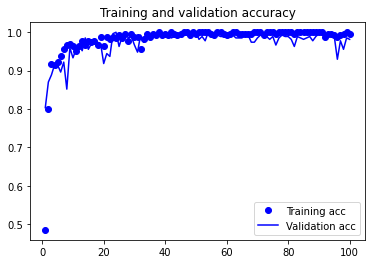

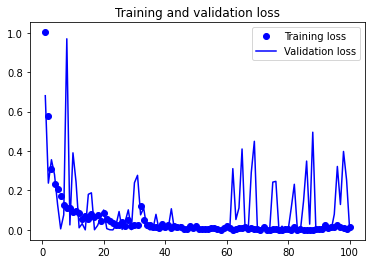

In [0]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


正解率と損失率をグラフ化(train2)

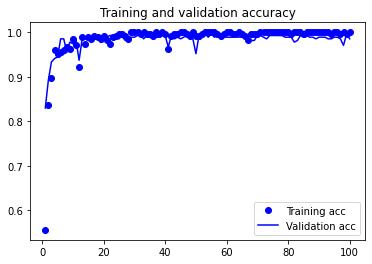

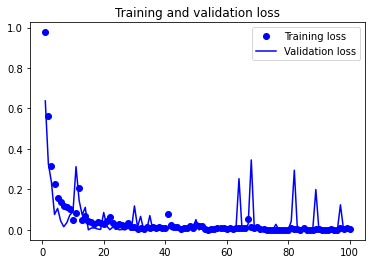

In [0]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


正解率と損失率をグラフ化(train3)

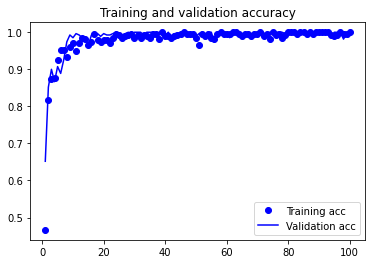

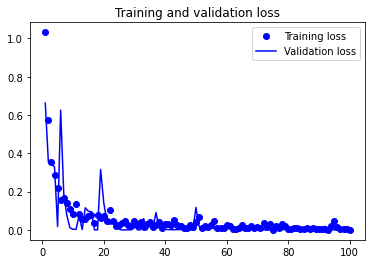

In [0]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

#正解率plot
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()


#損失値をplot
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
from sklearn.metrics import accuracy_score
from keras import models

In [0]:
model = create_cnn()
model.load_weights(f"weights_0.hdf5")
for layer in model.layers:
    layer.trainable = False

In [0]:
# 単体の推論(train1)
single_test1 = np.argmax(model.predict_generator(validation_generator1), axis=-1)
single_test_acc1 = accuracy_score(validation_generator1.classes[validation_generator1.index_array], single_test1)
print("Current Single Test Accuracy : ", single_test_acc1)

Current Single Test Accuracy :  0.9925925925925926


In [0]:
# 単体の推論(train2)
single_test2 = np.argmax(model.predict_generator(validation_generator2), axis=-1)
single_test_acc2 = accuracy_score(validation_generator2.classes[validation_generator2.index_array], single_test2)
print("Current Single Test Accuracy : ", single_test_acc2)

Current Single Test Accuracy :  0.32592592592592595


In [0]:
# 単体の推論(train3)
single_test3 = np.argmax(model.predict_generator(validation_generator3), axis=-1)
single_test_acc3 = accuracy_score(validation_generator3.classes[validation_generator3.index_array], single_test3)
print("Current Single Test Accuracy : ", single_test_acc3)

Current Single Test Accuracy :  0.9962962962962963
